In [1]:
import folium

import ee   # Google EarthEngine API
ee.Initialize()

In [2]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

In [3]:
import matplotlib.pyplot as plt

In [25]:
# Set visualization parameters.
vis_params = {
    'min': -1,
    'max': 8000,
    }
avhrr_col = ee.ImageCollection('NOAA/CDR/AVHRR/SR/V5')
avhrr_1 = avhrr_col.filter(ee.Filter.date('1985-07-01', '1985-07-05')).mean()  # do not select bands
map_id_dict = avhrr_1.getMapId(vis_params)
print(map_id_dict['tile_fetcher'].url_format)
tile_url = map_id_dict['tile_fetcher'].url_format

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/maps/2708845bfbae4e4d60321c21335fcef8-9b4b9c6f7f1392e85d14ce589b8219dd/tiles/{z}/{x}/{y}


In [26]:
test1 = cimgt.GoogleTiles(url = tile_url)

# Plot tile in default projection

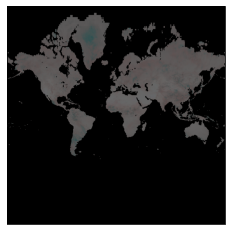

In [10]:
fig = plt.figure()
# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=test1.crs)
# Limit the extent of the map to a small longitude/latitude range.
# ax.set_extent([-22, -15, 63, 65], crs=ccrs.Geodetic())

# Add the data at zoom level 1
ax.add_image(test1, 1)

# Try reprojection
This way the resulting area is limited to the range defined by projection, but default plotting is not affected by the new projection.     
If the map tile is plotted with the tile's CRS, it will still be the EarthEngine's default

In [14]:
pr1 = avhrr_1.projection()

In [19]:
pr1.wkt().getInfo()

'GEOGCS["WGS 84", \n  DATUM["World Geodetic System 1984", \n    SPHEROID["WGS 84", 6378137.0, 298.257223563, AUTHORITY["EPSG","7030"]], \n    AUTHORITY["EPSG","6326"]], \n  PRIMEM["Greenwich", 0.0, AUTHORITY["EPSG","8901"]], \n  UNIT["degree", 0.017453292519943295], \n  AXIS["Geodetic longitude", EAST], \n  AXIS["Geodetic latitude", NORTH], \n  AUTHORITY["EPSG","4326"]]'

In [20]:
pr1.getInfo()

{'type': 'Projection', 'crs': 'EPSG:4326', 'transform': [1, 0, 0, 0, 1, 0]}

In [23]:
pr2 = ee.Projection('EPSG:3995')

In [24]:
pr2.getInfo()

{'type': 'Projection', 'crs': 'EPSG:3995', 'transform': [1, 0, 0, 0, 1, 0]}

In [11]:
avhrr_1 = avhrr_col.filter(ee.Filter.date('1985-07-01', '1985-07-05')).mean()  # do not select bands
# avhrr2 = avhrr_1.reproject(pr2)
avhrr3 = avhrr_1.reproject(crs='EPSG:3995', scale=10000)

In [33]:
?avhrr_1.reproject

Signature: avhrr_1.reproject(*args, **kwargs)
Docstring:
Force an image to be computed in a given projection and resolution.

Args:
  image: The image to reproject.
  crs: The CRS to project the image to.
  crsTransform: The list of CRS transform values.  This is
      a row-major ordering of the 3x2 transform matrix.
      This option is mutually exclusive with the scale
      option, and replaces any transform already on the
      projection.
  scale: If scale is specified, then the projection is scaled by
      dividing the specified scale value by the nominal size of a
      meter in the specified projection. If scale is not
      specified, then the scale of the given projection will be
      used.
File:      d:\app_tool\anaconda\envs\basic\lib\site-packages\ee\apifunction.py
Type:      method


In [30]:
map_id_dict = ee.Image(avhrr3).getMapId(vis_params)
tile_url = map_id_dict['tile_fetcher'].url_format
test1 = cimgt.GoogleTiles(url = tile_url)

HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request
HTTP Error 400: Bad Request


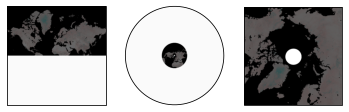

In [38]:
fig = plt.figure()
# Create a GeoAxes in the tile's projection.
ax1 = fig.add_subplot(1, 3, 1, projection=test1.crs)
ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.NorthPolarStereo())
ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.NorthPolarStereo())

# Add the Stamen data at zoom level 8.
ax1.add_image(test1, 1)
ax2.add_image(test1, 1)
ax3.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())
ax3.add_image(test1, 1)

# Try reprojecting tile only with cartopy

In [39]:
avhrr_1 = avhrr_col.filter(ee.Filter.date('1985-07-01', '1985-07-05')).mean()  # do not select bands
map_id_dict = avhrr_1.getMapId(vis_params)
print(map_id_dict['tile_fetcher'].url_format)
tile_url = map_id_dict['tile_fetcher'].url_format
test1 = cimgt.GoogleTiles(url = tile_url)

In [47]:
# try SeaWIFS chlorophyll-a
vis_params = {
    'min': 0,
    'max': 100,
    }
seawifs_col = ee.ImageCollection('NASA/OCEANDATA/SeaWiFS/L3SMI')
swf1 = seawifs_col.filter(ee.Filter.date('1998-07-01', '1998-08-01')).first()
map_id_dict = swf1.getMapId(vis_params)
tile_url = map_id_dict['tile_fetcher'].url_format
test2 = cimgt.GoogleTiles(url = tile_url)

In [44]:
print(test1.crs)
print(test2.crs)

+proj=merc +a=6378137.0 +b=6378137.0 +nadgrids=@null +lon_0=0.0 +x_0=0.0 +y_0=0.0 +units=m +no_defs +type=crs
+proj=merc +a=6378137.0 +b=6378137.0 +nadgrids=@null +lon_0=0.0 +x_0=0.0 +y_0=0.0 +units=m +no_defs +type=crs


In [41]:
print(ccrs.NorthPolarStereo)

<class 'cartopy.crs.NorthPolarStereo'>


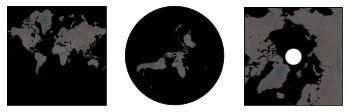

In [42]:
fig = plt.figure()
# Create a GeoAxes in the tile's projection.
ax1 = fig.add_subplot(1, 3, 1, projection=test1.crs)
ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.NorthPolarStereo())
ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.NorthPolarStereo())

# Add the Stamen data at zoom level 8.
ax1.add_image(test1, 1)
ax2.add_image(test1, 1)
ax3.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())
ax3.add_image(test1, 1)

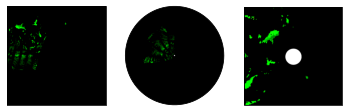

In [48]:
fig = plt.figure()
# Create a GeoAxes in the tile's projection.
ax1 = fig.add_subplot(1, 3, 1, projection=test2.crs)
ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.NorthPolarStereo())
ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.NorthPolarStereo())

# Add the Stamen data at zoom level 8.
ax1.add_image(test2, 1)
ax2.add_image(test2, 1)
ax3.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())
ax3.add_image(test2, 1)